<a href="https://colab.research.google.com/github/SaraBCoutinho/Pesquisa_Mestrado/blob/main/dendrograma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
#installs
!pip install deslib

In [ ]:
#imports
import pandas as pd
import numpy as np
from scipy.stats import entropy
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from deslib.util.diversity import double_fault

In [ ]:
#functions
def compute_pairwise_diversity_matrix(targets, prediction_matrix, diversity_func):
    n_classifiers = prediction_matrix.shape[1]
    diversity = np.zeros((n_classifiers, n_classifiers))
    for clf_index in range(n_classifiers):
        for clf_index2 in range(clf_index + 1, n_classifiers):
            this_diversity = diversity_func(targets,
                                            prediction_matrix[:, clf_index],
                                            prediction_matrix[:, clf_index2])

            diversity[clf_index, clf_index2] = this_diversity
            diversity[clf_index2, clf_index] = this_diversity

    return diversity

def shades_lines(link_id):
    shades = ['#000000', '#777777','#BBBBBB']
    return shades[link_id % len(shades)]

In [ ]:
#data
table_pred = pd.read_csv('/content/pred_val_a.csv')
table_pred = table_pred[['CV-SVM','GLOVE-LR','TFIDF-SVM','FAST-EXTRA','label']]
table_pred = table_pred.rename(columns = {'CV-SVM':'BERT-SVM', 'FAST-EXTRA':'TFIDF-SVM','TFIDF-SVM':'CV-NB'})
labels = table_pred["label"]
methods = table_pred
methods = table_pred.drop('label', axis=1)

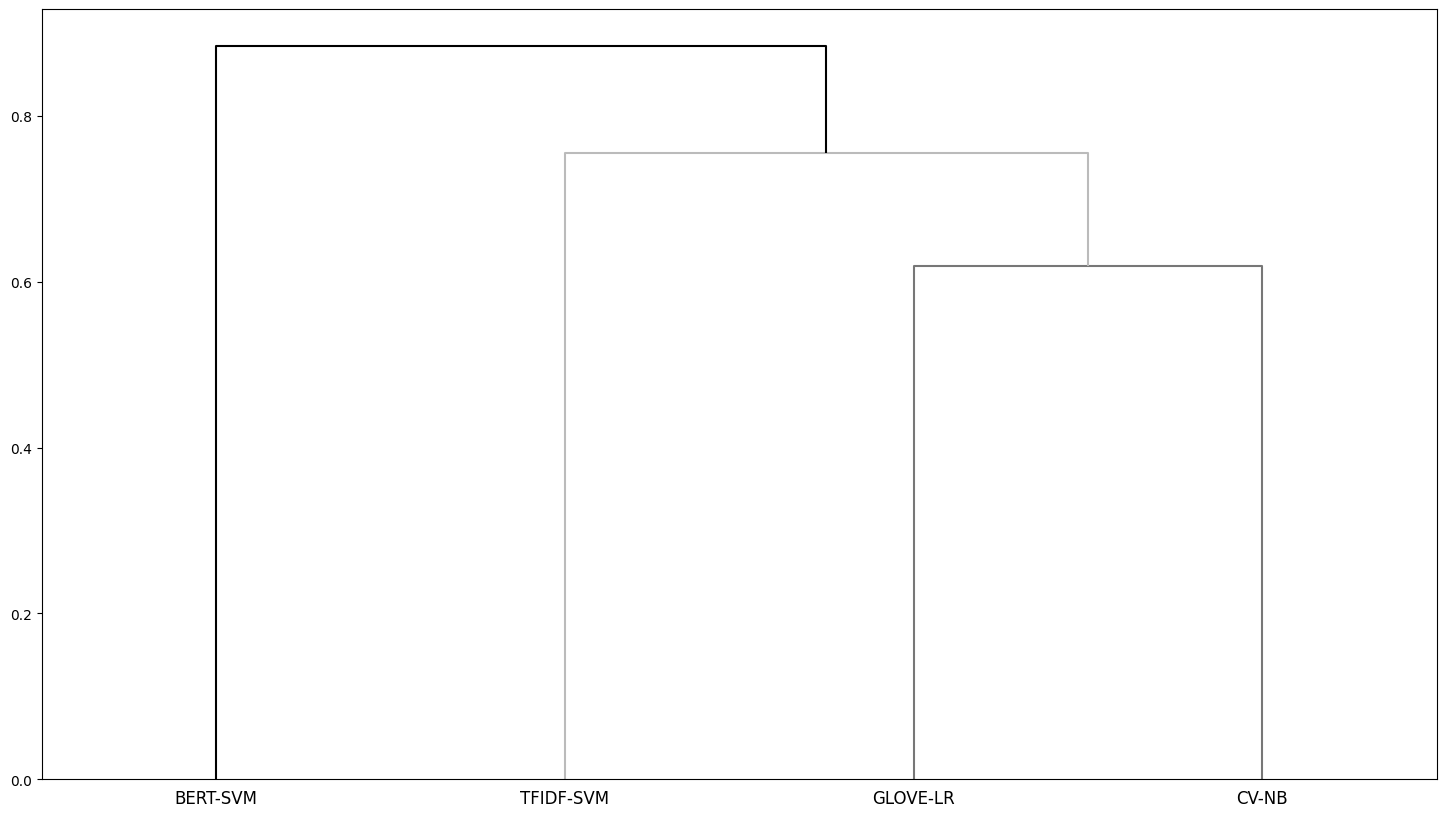

In [ ]:
#dendrogram
D = compute_pairwise_diversity_matrix(labels.to_numpy(), methods.to_numpy(), double_fault)

D_prime=np.triu(D)
z = linkage(D_prime,'average')
dataset_name='Liar'
plt.figure(figsize=(18,10))
dendrogram(z, labels = methods.columns, link_color_func = shades_lines)
plt.savefig('dendrogram_example.pdf')

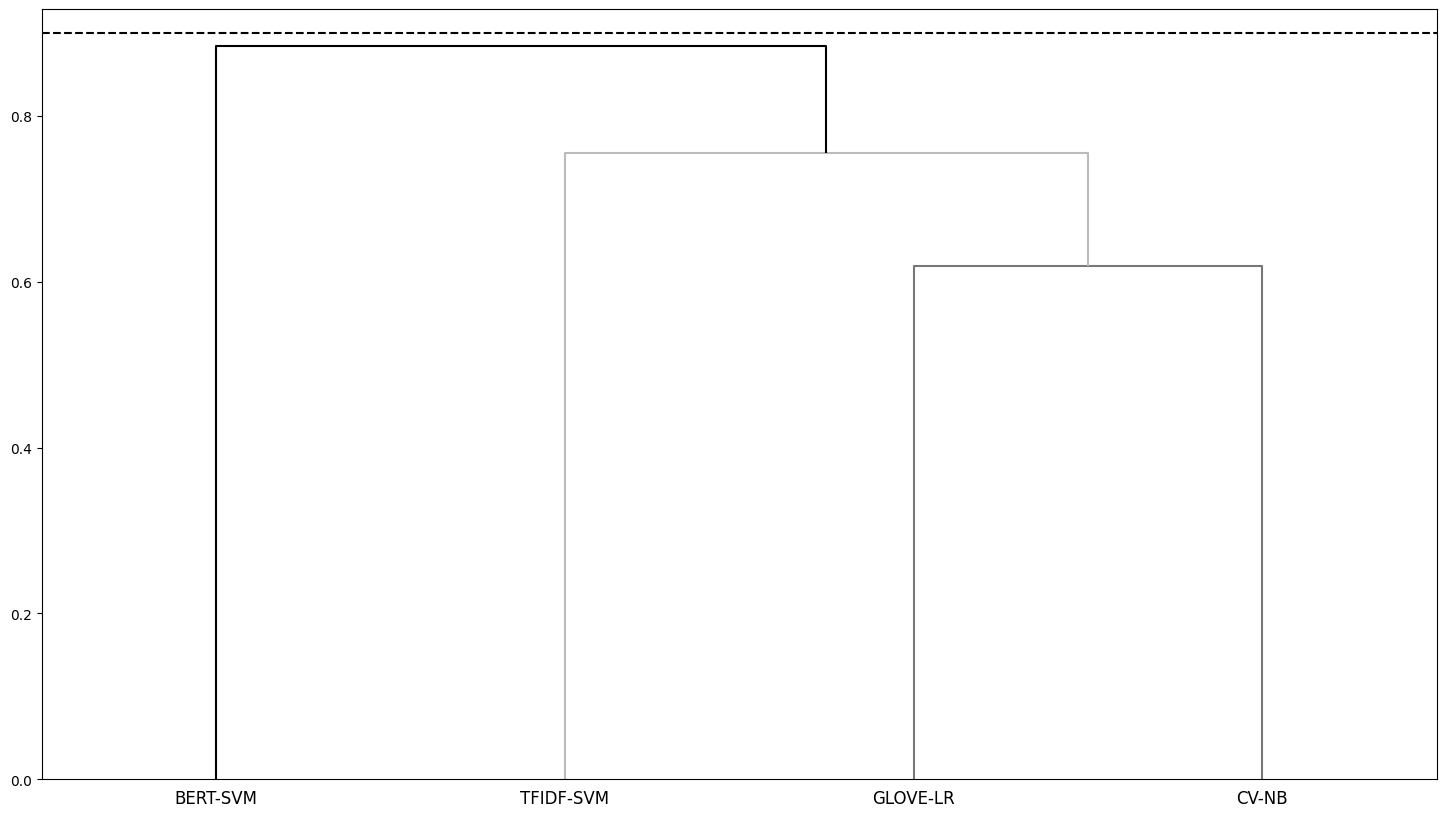

In [ ]:
plt.figure(figsize=(18,10))
cut_height = 0.9
dendrogram(z, labels = methods.columns, link_color_func = shades_lines)
plt.axhline(y=cut_height, c='black', lw=1.5, linestyle='--')
plt.savefig('dendrogram_example_1.pdf')

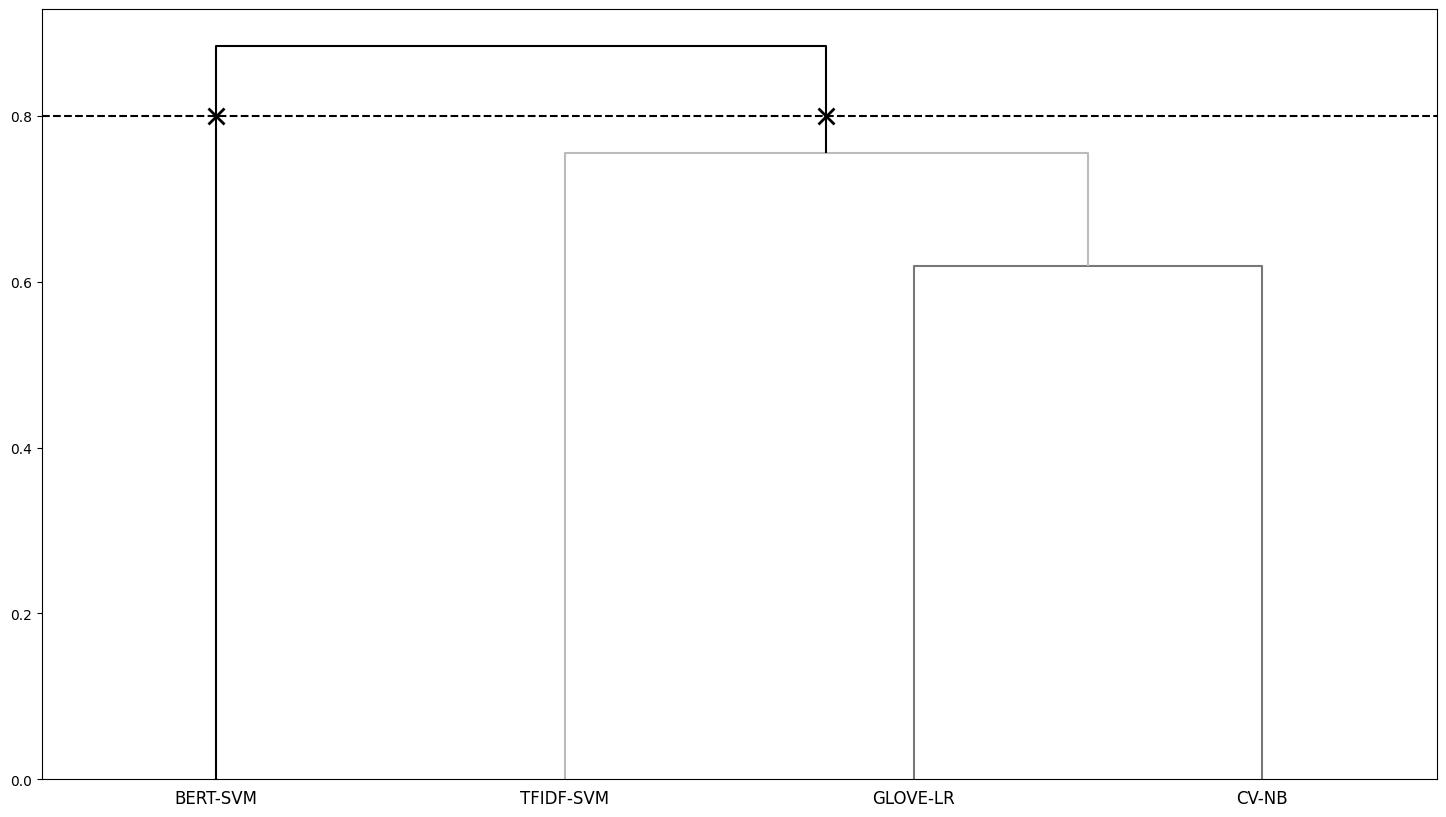

In [ ]:
plt.figure(figsize=(18,10))
cut_height = 0.8
ddata = dendrogram(z, labels = methods.columns, link_color_func = shades_lines)

cross_points = []

for icoord, dcoord in zip(ddata['icoord'], ddata['dcoord']):
    for i in range(3):
        x1, x2 = icoord[i], icoord[i + 1]
        y1, y2 = dcoord[i], dcoord[i + 1]

        if (y1 - cut_height) * (y2 - cut_height) < 0:
            x_cross = x1 + (cut_height - y1) * (x2 - x1) / (y2 - y1)
            y_cross = cut_height
            cross_points.append((x_cross, y_cross))

for (x, y) in cross_points:
    plt.plot(x, y, marker='x', color='black', markersize=12, markeredgewidth=2)

plt.axhline(y=cut_height, c='black', lw=1.5, linestyle='--')
plt.savefig('dendrogram_example_2.pdf')

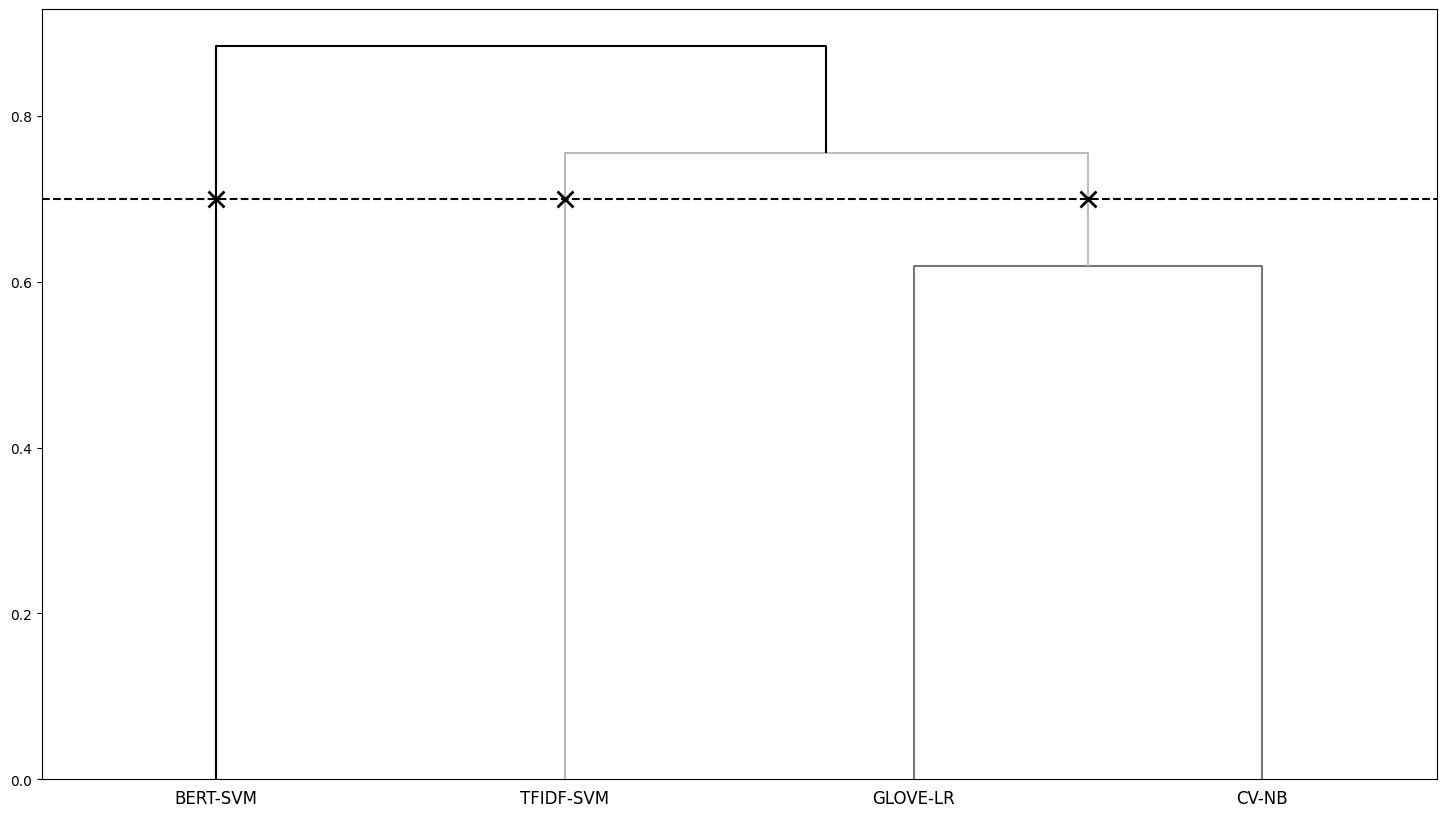

In [ ]:
plt.figure(figsize=(18,10))
cut_height = 0.7
ddata = dendrogram(z, labels = methods.columns, link_color_func = shades_lines)

cross_points = []

for icoord, dcoord in zip(ddata['icoord'], ddata['dcoord']):
    for i in range(3):
        x1, x2 = icoord[i], icoord[i + 1]
        y1, y2 = dcoord[i], dcoord[i + 1]

        if (y1 - cut_height) * (y2 - cut_height) < 0:
            x_cross = x1 + (cut_height - y1) * (x2 - x1) / (y2 - y1)
            y_cross = cut_height
            cross_points.append((x_cross, y_cross))

for (x, y) in cross_points:
    plt.plot(x, y, marker='x', color='black', markersize=12, markeredgewidth=2)

plt.axhline(y=cut_height, c='black', lw=1.5, linestyle='--')
plt.savefig('dendrogram_example_3.pdf')

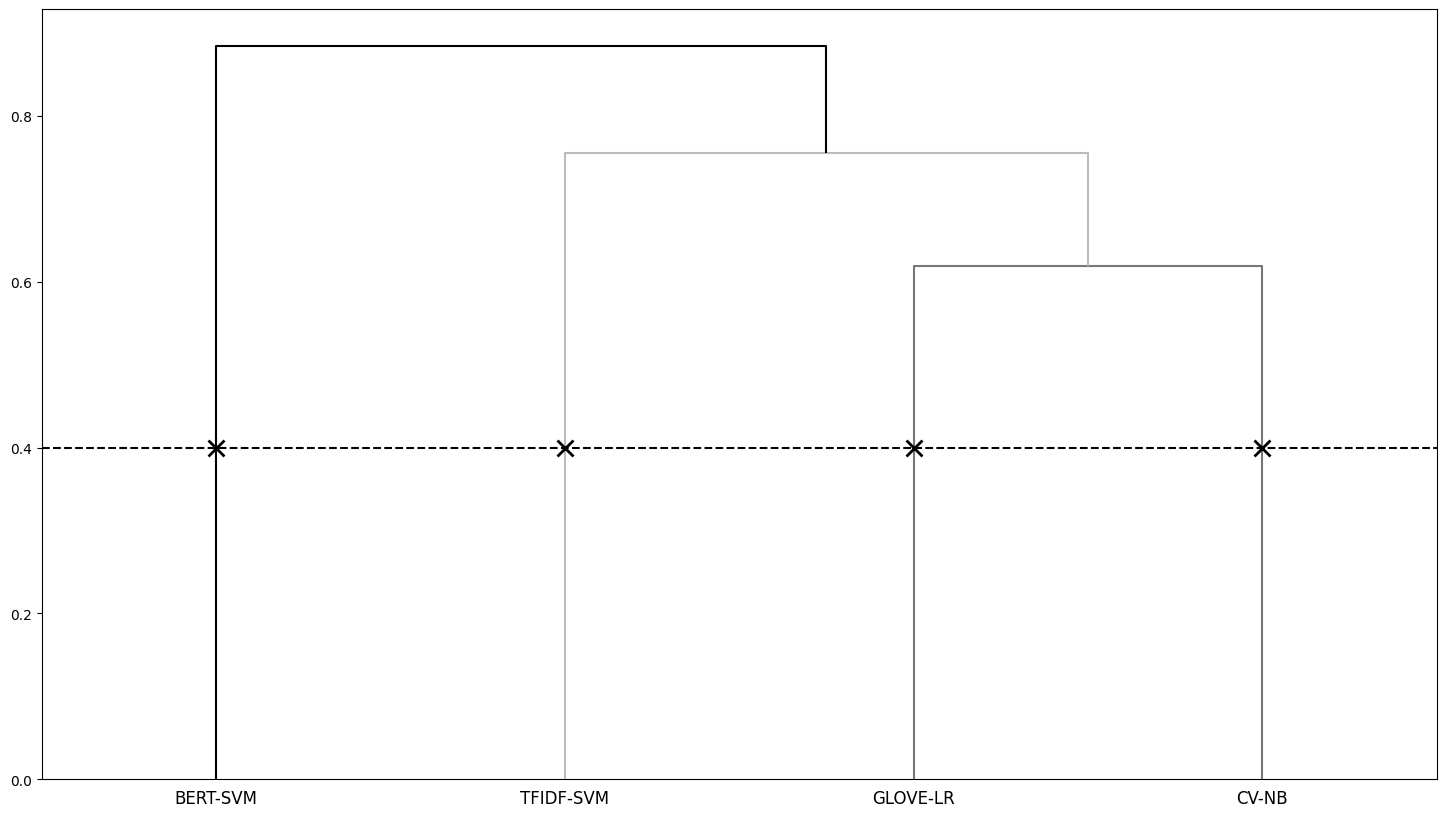

In [ ]:
plt.figure(figsize=(18,10))
cut_height = 0.4
ddata = dendrogram(z, labels = methods.columns, link_color_func = shades_lines)

cross_points = []

for icoord, dcoord in zip(ddata['icoord'], ddata['dcoord']):
    for i in range(3):
        x1, x2 = icoord[i], icoord[i + 1]
        y1, y2 = dcoord[i], dcoord[i + 1]

        if (y1 - cut_height) * (y2 - cut_height) < 0:
            x_cross = x1 + (cut_height - y1) * (x2 - x1) / (y2 - y1)
            y_cross = cut_height
            cross_points.append((x_cross, y_cross))

for (x, y) in cross_points:
    plt.plot(x, y, marker='x', color='black', markersize=12, markeredgewidth=2)

plt.axhline(y=cut_height, c='black', lw=1.5, linestyle='--')
plt.savefig('dendrogram_example_4.pdf')